In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [8]:
df_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [9]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

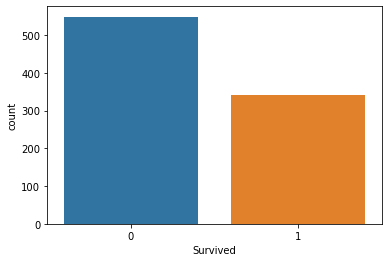

In [10]:
print(df_train['Survived'].value_counts())
sns.countplot(x=df_train['Survived'])

<AxesSubplot:xlabel='agegroupbytitle', ylabel='count'>

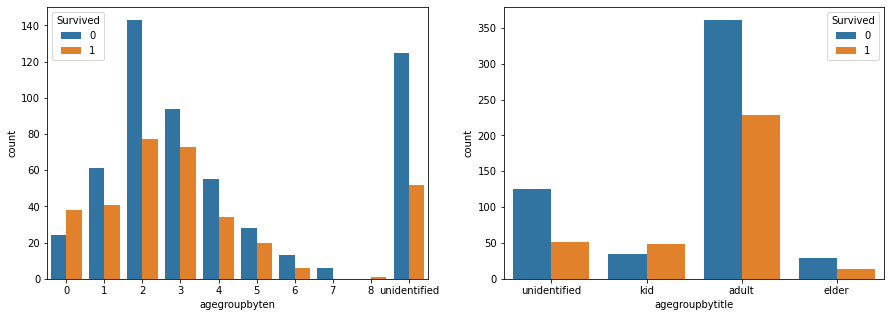

In [25]:
def groupagebyten(row):
    if (np.isnan(row.Age)):
        return 'unidentified'
    return int(row.Age/10)

df_train['agegroupbyten'] = df_train.apply(groupagebyten,axis=1)
df_train['agegroupbyten'] = df_train['agegroupbyten'].astype('category')

def groupagebytitle(row):
    if (row.Age<16):
        return 1
    if row.Age>=16 and row.Age<55 :
        return 2
    if row.Age>=55:
        return 3
    return 0
df_train['agegroupbytitle'] = df_train.apply(groupagebytitle,axis=1)
df_train['agegroupbytitle'] = df_train['agegroupbytitle'].astype('category').cat.rename_categories(['unidentified','kid','adult','elder'])

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='agegroupbyten',hue = 'Survived',data=df_train,ax=axes[0])
sns.countplot(x='agegroupbytitle',hue = 'Survived', data = df_train, ax=axes[1])

In [26]:
df_train.drop('Ticket',axis=1,inplace=True)

In [27]:
df_train.sort_values('Fare',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,agegroupbyten,agegroupbytitle
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,unidentified,C,3,adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,solo,C,3,adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,group,C,3,adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,group,S,2,adult
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,group,S,1,adult
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,group,S,2,adult
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,group,S,6,elder
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,group,C,1,adult
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,group,C,2,adult
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,group,C,2,adult


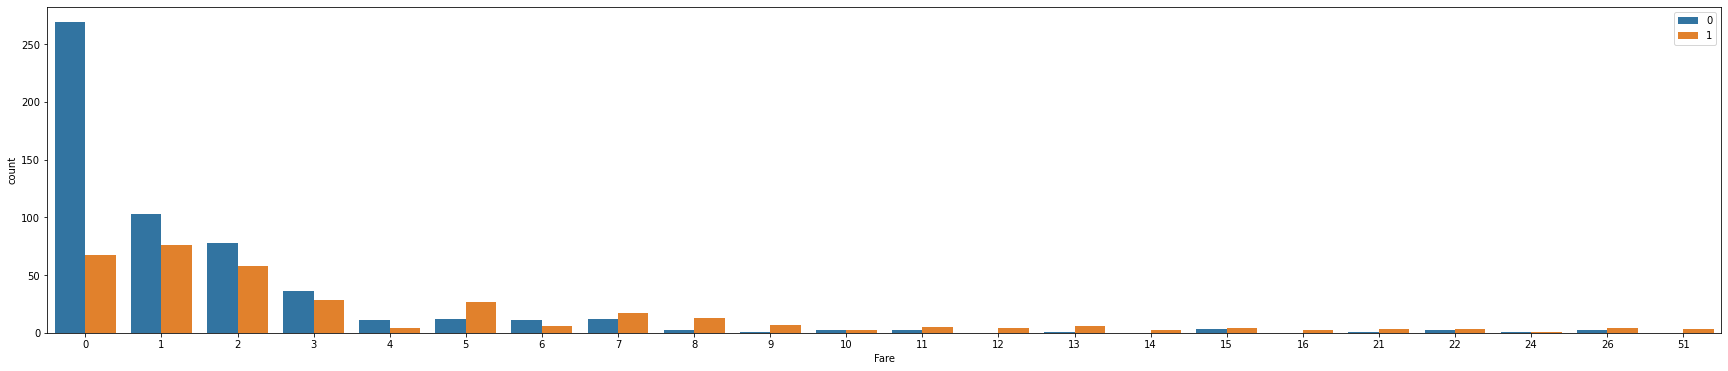

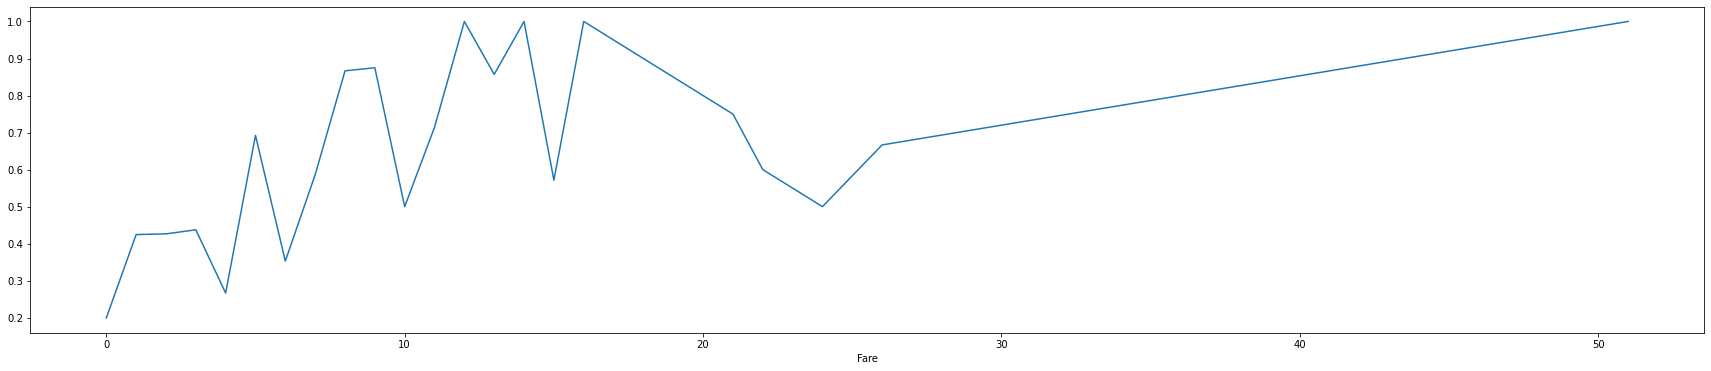

In [14]:
df_train['Fare'] = (df_train['Fare']/10).astype(int)
plt.figure(figsize=(30,6))
sns.countplot(x='Fare', hue='Survived', data=df_train)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(30,6))
df_train.groupby('Fare').mean()['Survived'].plot()
plt.show()

In [15]:
df_train.groupby('Cabin').groups.keys()

dict_keys(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18', 'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34', 'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E

<AxesSubplot:title={'center':'Survival rate for each Cabin'}, xlabel='count', ylabel='Cabin'>

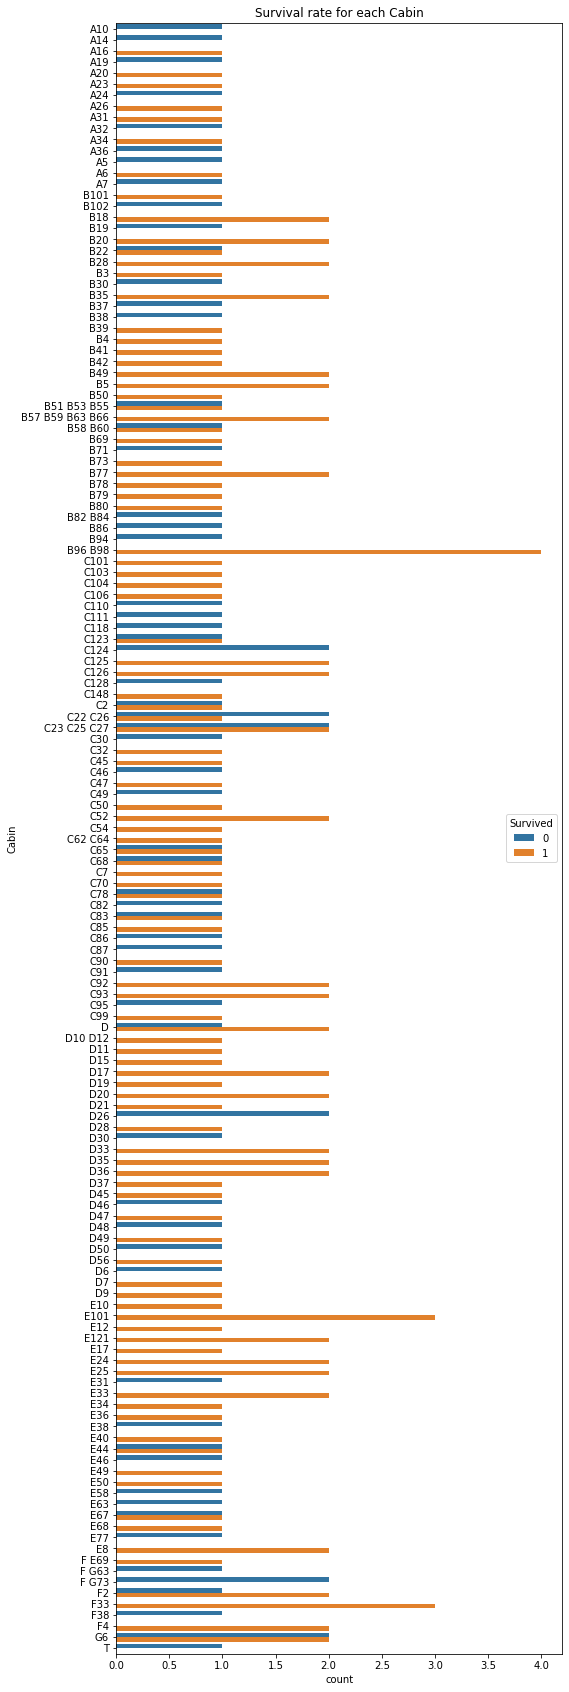

In [16]:
plt.figure(figsize=(8,30))
plt.title('Survival rate for each Cabin')
sns.countplot(y='Cabin', hue = 'Survived',data=df_train.sort_values('Cabin'),orient='h')

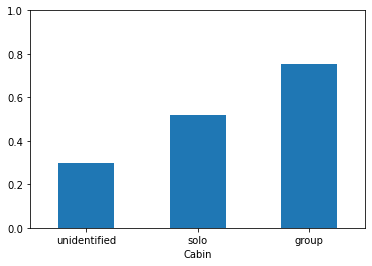

In [19]:
def groupCabin(row):
    if (pd.isna(row.Cabin)):
        return 0
    if (pd.concat([df_train['Cabin'],df_test['Cabin']]).value_counts()[row.Cabin]>1):
        return 2
    return 1

df_train['Cabin'] = df_train.apply(groupCabin,axis=1)
df_train['Cabin'] = df_train['Cabin'].astype('category').cat.rename_categories(['unidentified','solo','group'])

g = df_train.groupby('Cabin').mean()['Survived'].plot.bar()
g.set_xticklabels(g.get_xticklabels(),rotation=0)
plt.ylim(top=1)
plt.show()

In [20]:
df_train['Embarked'].fillna('S',inplace=True)

In [23]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unidentified,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,group,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unidentified,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,group,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unidentified,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unidentified,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,solo,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,unidentified,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,solo,C


# Build Model & Prediction

In [28]:
df2 = df_train

X = df2[['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked','agegroupbytitle']]

In [31]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex','Cabin','Embarked','agegroupbytitle']

for i in features:
    le = LabelEncoder()
    le = le.fit(df2[i])
    df2[i] = le.transform(df2[i])

In [33]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,agegroupbyten,agegroupbytitle
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0,3,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,2,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,2,3,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,2,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,1,2,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,2,2,unidentified,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1,0,2,0


In [36]:
df2.drop('Name',axis=1,inplace=True)